#Customer Churn Prediction using Machine Learning

* Melakukan Exploratory Data Analysis
* Melakukan Data Pre-Processing
* Melakukan Pemodelan Machine Learning
* Menentukan Model Terbaik

In [1]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

#### File Unloading

In [2]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender  ... MonthlyCharges TotalCharges  Churn
0     202006  45759018157  Female  ...          29.85        29.85     No
1     202006  45315483266    Male  ...          20.50      1198.80     No
2     202006  45236961615    Male  ...         104.10       541.90    Yes
3     202006  45929827382  Female  ...         115.50      8312.75     No
4     202006  45305082233  Female  ...          81.25      4620.40     No

[5 rows x 13 columns]
6950


### Exploratory Data Analysis (EDA)

#### Exploratory Data Analysis

##### Beberapa cara melakukan EDA
* Univariat Analysis — analisis deskriptif dengan satu variabel.
* Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
* Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

##### Dalam kasus ini, melihat persebaran data dari:
* Prosentase persebaran data Churn dan tidaknya dari seluruh data
* Persebarang data dari variable predictor terhadap label (Churn)

In [3]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#### Memvisualisasikan Prosentase Churn

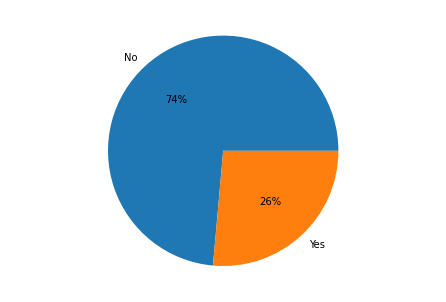

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Univariat Analysis
#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

#value_counts() untuk menghitung banyaknya unik dari sebuah kolom 
#pie() untuk membuat pie chart

#### Exploratory Data Analysis (EDA) Variabel Numerik
##### Memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat


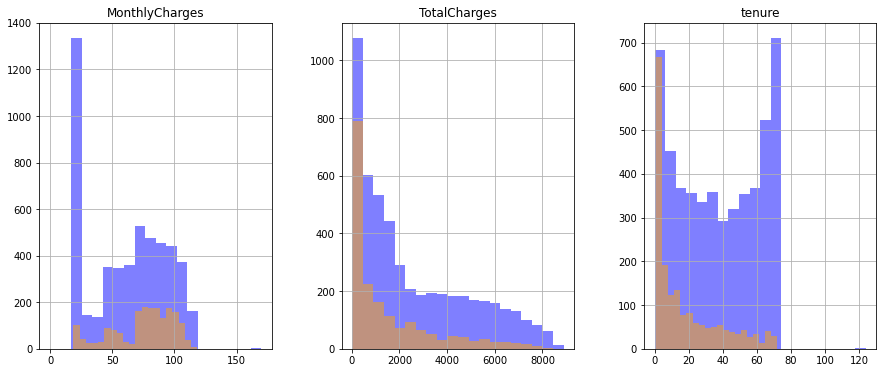

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange',alpha=0.5, ax=ax)
plt.show()

#subplots() untuk membuat gambar dan satu set subplot.

#### Exploratory Data Analysis (EDA) Variabel Kategorik
##### Memilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat

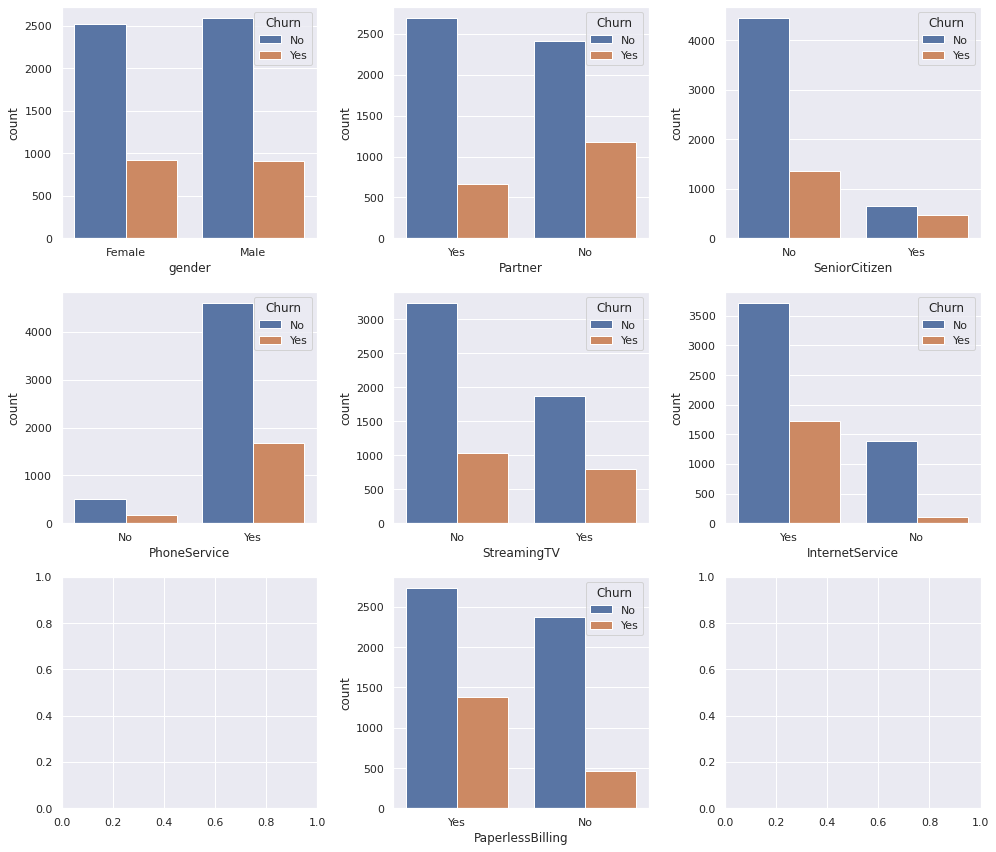

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

#countplot() untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

####Kesimpulan

* pada tahap visualisasi prosentase churn dapat diketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.
* pada tahap EDA variable numerik dapat diketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
* pada tahap EDA variable kategorik dapat diketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

###Data PreProcessing

##### Menghapus Unnecessary Columns dari data

In [8]:
import numpy as np
import pandas as pd

#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'],axis=1)
print(cleaned_df.head())

#drop() untuk menghapus kolom dari suatu data

   gender SeniorCitizen Partner  ...  MonthlyCharges TotalCharges Churn
0  Female            No     Yes  ...           29.85        29.85    No
1    Male            No     Yes  ...           20.50      1198.80    No
2    Male            No      No  ...          104.10       541.90   Yes
3  Female            No     Yes  ...          115.50      8312.75    No
4  Female            No     Yes  ...           81.25      4620.40    No

[5 rows x 11 columns]


#### Encoding Data

In [9]:
#Use cleaned_df

from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

#LabelEncoder()untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric
#describe() untuk melihat deskripsi datanya.

            tenure  MonthlyCharges  TotalCharges        Churn
count  6950.000000     6950.000000   6950.000000  6950.000000
mean     32.423165       64.992201   2286.058750     0.264173
std      24.581073       30.032040   2265.702553     0.440923
min       0.000000        0.000000     19.000000     0.000000
25%       9.000000       36.462500    406.975000     0.000000
50%      29.000000       70.450000   1400.850000     0.000000
75%      55.000000       89.850000   3799.837500     1.000000
max     124.000000      169.931250   8889.131250     1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


#### Splitting Dataset
##### dataset dibagi menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y)

In [10]:
#Use cleaned_df
from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari X_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

# train_test_split() untuk membagi data
# value_counts untuk mengecek apakah pembagian sudah sama proporsinya

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari X_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


#### Kesimpulan
##### Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

### Modelling: Logistic Regression

#####Pembuatan Model

In [16]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

#LogisticRegression() memanggil algoritma Logistic Regression

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Performansi Model Training - Menampilkan Metrics

In [17]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

#classification_report() perhitungan untuk memperoleh classification reportnya pada data training 

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



####Performansi Model Training - Menampilkan Plots

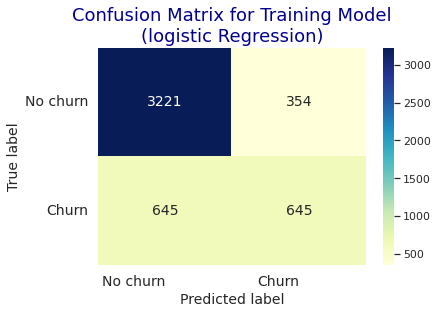

In [28]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#Confusion matrix ini diperoleh dengan menggunakan confusion_matrix dan dapat divisualisasikan dengan menggunakan heatmap dari seaborn.

####Performansi Data Testing - Menampilkan Metrics

In [26]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

#perhitungan untuk memperoleh classification reportnya pada data testing menggunakan classification_report().

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.79      2085



####Performansi Data Testing - Menampilkan Plots

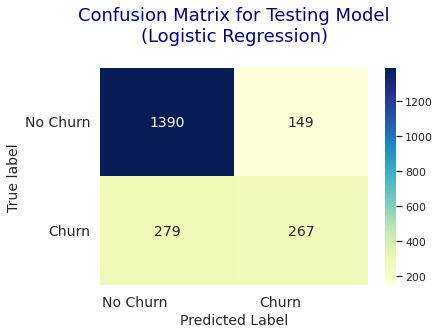

In [27]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

#Confusion matrix ini diperoleh dengan menggunakan confusion_matrix dan divisualisasikan dengan menggunakan heatmap dari seaborn.

####Kesimpulan

* Jika menggunakan algoritma logistic regression dengan memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
* Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 645, tebakan tidak churn yang sebenernya tidak churn adalah 3221, tebakan tidak churn yang sebenernya benar churn adalah 645 dan tebakan churn yang sebenernya tidak churn adalah 645.
* Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 267, tebakan tidak churn yang sebenernya tidak churn adalah 1390, tebakan tidak churn yang sebenernya benar churn adalah 279 dan tebakan churn yang sebenernya tidak churn adalah 149.

###Modelling : Random Forest Classifier

####Pembuatan Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

#RandomForestClassifier() memanggil algoritma Random Forest Classifier

RandomForestClassifier()


####Performansi Data Training - Menampilkan Metrics

In [30]:
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



####Performansi Data Training - Menampilkan Plots

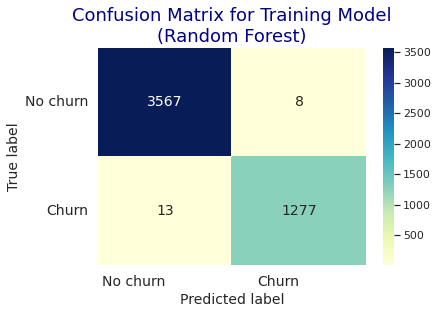

In [32]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####Performansi Data Testing - Menampilkan Metrics

In [33]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.60      0.49      0.54       546

    accuracy                           0.78      2085
   macro avg       0.71      0.69      0.70      2085
weighted avg       0.77      0.78      0.77      2085



####Performansi Data Testing - Menampilkan Plots

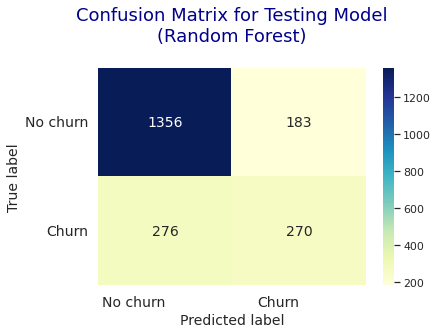

In [34]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####Kesimpulan

* Jika menggunakan algoritma Random Forest dengan memanggil RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
* Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan churn yang sebenernya benar churn adalah 1277, tebakan tidak churn yang sebenernya tidak churn adalah 3567, tebakan tidak churn yang sebenernya benar churn adalah 13 dan tebakan churn yang sebenernya tidak churn adalah 8.
* Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 270, tebakan tidak churn yang sebenernya tidak churn adalah 1356, tebakan tidak churn yang sebenernya benar churn adalah 276 dan tebakan churn yang sebenernya tidak churn adalah 183.

###Modelling: Gradient Boosting Classifier

####Pembuatan Model

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

#GradientBoostingClassifier() untuk memanggil algoritma Gradient Boosting Classifier

GradientBoostingClassifier()


####Perfomansi Model Data Training - Menampilkan Metrics

In [36]:
from sklearn.metrics import classification_report
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



####Perfomansi Model Data Training - Menampilkan Plots

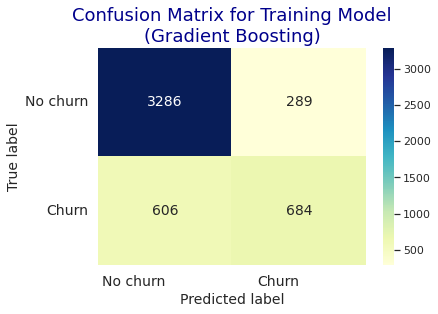

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####Performansi Model Data Testing - Menampilkan Metrics

In [38]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



####Performansi Model Data Testing - Menampilkan Plots

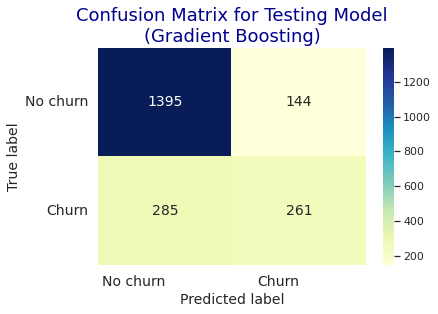

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####Kesimpulan

* Jika menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
* Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.
* Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1395, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 144.

### Memilih Model Terbaik

####Menentukan Algoritma Model Terbaik
#####Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

* Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
* Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
* Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

In [41]:
print(log_model)

#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

LogisticRegression()


####Kesimpulan
#####Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 79%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak dijadikan untuk menarik kesimpulan bahwasannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.

